<a href="https://colab.research.google.com/github/C8rr3d8rr/C8rr3d8rr/blob/main/Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Kurtosis </h1>

---
---


In [ ]:
#Se importan las bibliotecas
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import numpy             as np
import scipy.stats       as sp
import random
from   numpy             import absolute, mean
from   seaborn           import displot

In [ ]:
#Creacion de un data set
data = {
    'Normal'   : [13.471922, 16.823155, 12.600003, 12.855856, 12.555801, 13.471922, 13.555801, 12.555801, 14.789832, 17.09182, 18.891231, 16.897654, 16.855856],
    'Uniforme' : [14.253059, 15.156835, 14.894070, 14.484451, 15.864681, 14.253059, 14.987322, 14.987322, 14.784612, 14.98241, 15.896754, 16.896745, 13.895767]
}

df=pd.DataFrame(data)

In [ ]:
df.head()

,Normal,Uniforme
0,13.471922,14.253059
1,16.823155,15.156835
2,12.600003,14.894070
3,12.855856,14.484451
4,12.555801,15.864681


<Axes: xlabel='Normal', ylabel='Count'>

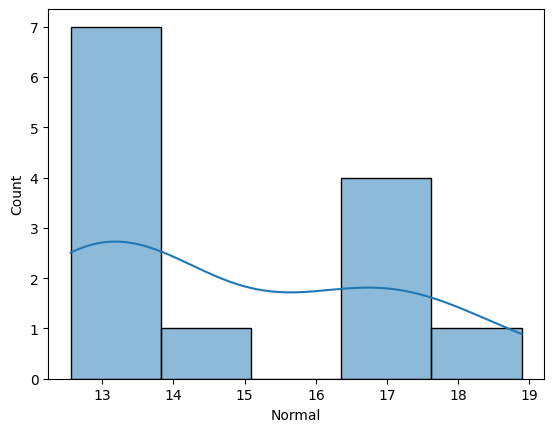

In [ ]:
sns.histplot(df['Normal'], kde=True)

In [ ]:
sp.kurtosis(df['Normal'])
#Entre el valor de la kurtosis llegue a 0, se puede decir que la distribucion de los datos es normal
#Una curtosis positiva indica que los datos muestran más valores atípico extremos que una distribución normal

-1.257077738521474


<h1> Sesgo de confianza de un conjunto de datos</h1>

---
---


In [ ]:
#Se importan las bibliotecas
import pandas        as pd
import seaborn       as sns
from   scipy.stats   import skew
import random

In [ ]:
#Se crean unas variables para trabajar con ellas
exponencial =[]
normal      =[]

for i in range (400):
  exponencial.append(random.expovariate(0.40))  #Este valor de lambda tiene que ser menor a 0 y mayor 1
exponencial

for i in range (400):
  normal.append(random.gauss(20, 0.5))  #Se crea un valor de la media y uno de desviacion estandar
normal

In [ ]:
#Se crea un dataframe con la lista ya creada
datos = {
    'Exponencial' : exponencial,
    'Normal'      : normal
}

df=pd.DataFrame(datos)

<Axes: xlabel='Exponencial', ylabel='Count'>

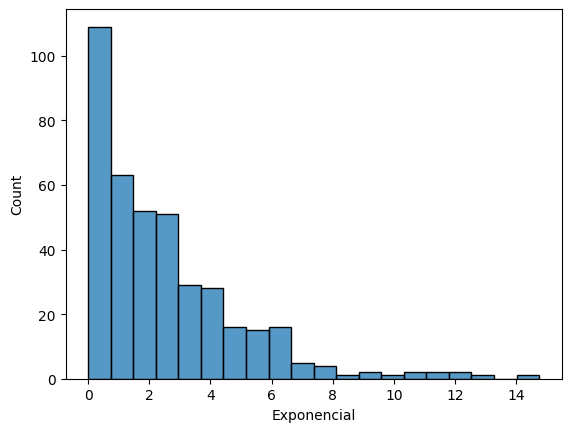

In [ ]:
#Distribucion de los datos en un histograma
sns.histplot(df['Exponencial'])

In [ ]:
#Calculo de coeficiente de simetria
skew(df['Exponencial'])

1.7832300992324805

<Axes: xlabel='Normal', ylabel='Count'>

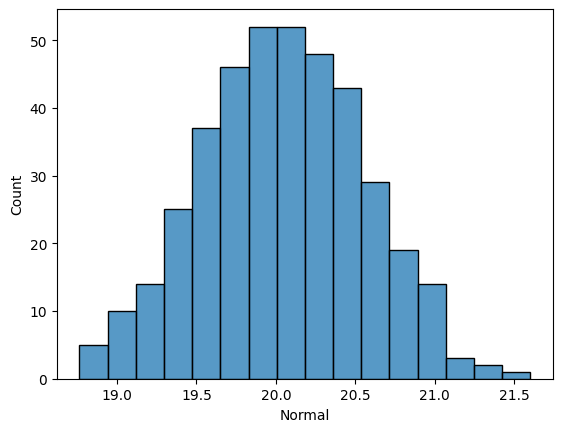

In [ ]:
#Distribucion de los datos en un histograma
sns.histplot(df['Normal'])

In [ ]:
#Calculo de coeficiente de simetria
skew(df['Normal'])

0.02628107606502427

<h1>Prueba de Normalidad Shapiro Wilk </h1>

---

---


In [ ]:
#Se importan las bibliotecas
import seaborn       as sns
import scipy.stats   as stats
import random

In [ ]:
#Se crea un dataframe con la lista ya creada
exponencial =[]

for i in range(2000):
  exponencial.append(random.expovariate(0.2))
exponencial

<Axes: ylabel='Count'>

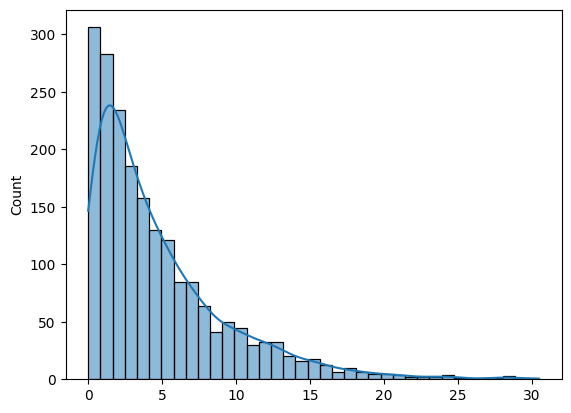

In [ ]:
#Distribucion de los datos en un histograma
sns.histplot(exponencial, kde=True)

In [ ]:
#Creacion de la prueba de shapiro
w,p = stats.shapiro(exponencial)
print(w,p)

# El primer valor corresponde a w, es un dato estadistico de prueba que tenemos que ir a comprar con las tablas de la prueba de shapiro.
# El segundo valor corresponde a p, para deteminar si los datos siguen una distribucion normal, para concluir tenemos que deteminar si el valor p es
# mayor a 0.05 para determinar si los datos son normales.

0.8324953317642212 1.3340361380372259e-41


In [ ]:
#Valores que siguen una distribucion normal

normal = []

for i in range(2000):
  normal.append(random.normalvariate(12, 0.5)) #Se crea un valor de la media y uno de desviacion estandar
normal

<Axes: ylabel='Count'>

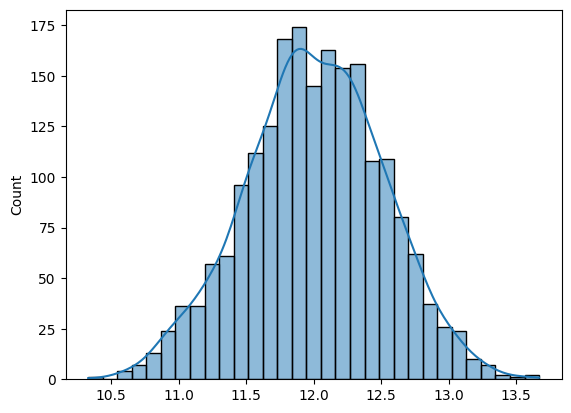

In [ ]:
sns.histplot(normal, kde=True)

In [ ]:
w,p = stats.shapiro(normal)
print(w,p)
# p> 0.05 los datos son de distribucion normal

0.9989222288131714 0.2661886513233185


<h1>Intervalos de Confianza para la Media</h1>

---

---

In [ ]:
#Se importan las bibliotecas
import pandas           as pd
import numpy            as np
import statsmodels.api  as sm

In [ ]:
#Creacion de un DataFrame
data = {
    'id'           : [1, 2, 3, 4, 5, 6, 7, 8],
    'name'         : ['daniel','camilo','maria','eloisa','julian','ricardo','rosa','marlene'],
    'age'          : [56,26,33,39,27,24,27,27],
    'gender'       : ['f','f','f','f','m','m','m','m'],
    'gender_group' : [ 1,1,1,1,2,2,2,2],
    'glases'       : ['y','y','y','y','n','n','n','n'],
    'height'       : [62.00,62.00,66.00,64.00,73.00,75.00,78.00,80.00],
    'wingspan'     : [61.00,60.00,64.00,63.00,75.00,71.00,80.00,82.00],
    'distance'     : [79,70,85,87,72,81,90,92]

}

df=pd.DataFrame(data)
df

,id,name,age,gender,gender_group,glases,height,wingspan,distance
0,1,daniel,56,f,1,y,62.0,61.0,79
1,2,camilo,26,f,1,y,62.0,60.0,70
2,3,maria,33,f,1,y,66.0,64.0,85
3,4,eloisa,39,f,1,y,64.0,63.0,87
4,5,julian,27,m,2,n,73.0,75.0,72
5,6,ricardo,24,m,2,n,75.0,71.0,81
6,7,rosa,27,m,2,n,78.0,80.0,90
7,8,marlene,27,m,2,n,80.0,82.0,92


En esta parte, se elaboro una forma manual

In [ ]:
#Generacion de la media y la desviacion estandar
media = df["distance"].mean() #mean = media
desviacion_esta = df["distance"].std() #std(standard deviation) = desviacion estandar
num=len(df) #len = saber la cantidad de filas
error_estandar = desviacion_esta/np.sqrt(num)
test_t = 2.064
test_z = 1.96
limite_inferior = media-test_z*error_estandar
limite_superior = media+test_z*error_estandar
print(media)
(limite_inferior,limite_superior)

82.0


(76.43158909562162, 87.56841090437838)

En esta parte, vamos elaborar el calculo con la libreria que importamos statsmodels.api

In [ ]:
sm.stats.DescrStatsW(df["distance"]).zconfint_mean()

(76.43169141647871, 87.56830858352129)

El intervalo de confianza describe la variabilidad entre la medida obtenida en un estudio y la medida real de la población (el valor real). Corresponde a un rango de valores, cuya distribución es normal y en el cual se encuentra, con alta probabilidad, el valor real de una determinada variable.

<h1>Intervalos de Confianza para Proporciones </h1>

---

---

In [ ]:
#Se importan las bibliotecas
import numpy           as np
import statsmodels.api as sm

Cuando utilizamos esta estimacion de proporcion estamos interesados en saber la cantidad de personas que cumplen con cierta caracteristica, es decir un ejemplo la cantidad de personas que les gustaria votar por un candidato. Otro ejemplo queremos saber la cantidad de productos defectuosos de un lote.

In [ ]:
#Definimos las variables
lote_p  = 0.85 #piezas defectuosas o cantidad de personas que votarian por un solo candidato
piezas_n = 659  #Cantidad de piezas o cantdidad de personas que votarian por un candidado
error_estandar = np.sqrt((Lote_p*(1-lote_p))/piezas_n)
error_estandar

0.01390952774409444

In [ ]:
tstart = 1.96 # Este valor corresponde a un nivel de confianza del 95%
limite_infe = lote_p - tstart*error_estandar
limite_supe = lote_p + tstart*error_estandar
(limite_infe,limite_supe)

(0.8227373256215749, 0.8772626743784251)

In [ ]:
sm.stats.proportion_confint(piezas_n*lote_p, piezas_n)

(0.8227378265796143, 0.8772621734203857)